In [ ]:
cd /content/drive/Shareddrives/개별연구/saram1118/darknet

/content/drive/Shareddrives/개별연구/saram1118/darknet




```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 파일 첫 이용시 다운로드 세팅

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14421, done.
remote: Total 14421 (delta 0), reused 0 (delta 0), pack-reused 14421
Receiving objects: 100% (14421/14421), 13.14 MiB | 7.62 MiB/s, done.
Resolving deltas: 100% (9803/9803), done.
Checking out files: 100% (2023/2023), done.


In [ ]:
cd darknet

/content/drive/Shareddrives/개별연구/saram1118/darknet


In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-11-18 13:16:59--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   361KB/s    in 8m 53s  

2020-11-18 13:25:54 (455 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-11-18 13:37:13--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   736KB/s    in 4m 34s  

2020-11-18 13:41:49 (579 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
ls

3rdparty/               darknet.py              obj/
backup/                 darknet_video.py        obj.data
build/                  data/                   obj.names
build.ps1               generate_train.py       README.md
build.sh*               image_yolov3.sh*        results/
cfg/                    image_yolov4.sh*        scripts/
cmake/                  include/                src/
CMakeLists.txt          json_mjpeg_streams.sh*  video_yolov3.sh*
darknet*                LICENSE                 video_yolov4.sh*
darknet53.conv.74       Makefile                yolov3_custom.cfg
DarknetConfig.cmake.in  net_cam_v3.sh*          yolov3.weights
darknet_images.py       net_cam_v4.sh*


# GPU설정


In [ ]:
# change makefile to have GPU and OPENCV enabled
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_opencv.cpp:1130:10: note: ...thi

# 이미지 처음 학습시킬때 이미지 목록의 txt파일 생성하는 코드


In [ ]:
!python generate_train.py

만들어졌나 확인하기 

In [ ]:
cd data

/content/drive/Shareddrives/개별연구/saram1118/darknet/data


In [ ]:
ls

9k.tree                   labels/           train_1128.txt
coco9k.map                model_test/       train_1203.txt
coco.names                openimages.names  train_pbody_stand.txt
goal.txt                  Person_90/        train_pbody.txt
imagenet.labels.list      Person_90_1128/   voc.names
imagenet.shortnames.list  train_1127.txt


# 학습하기


In [ ]:
cd ../

/content/drive/Shareddrives/개별연구/saram1118/darknet


In [ ]:
ls

3rdparty/                CMakeLists.txt          net_cam_v3.sh*
backup/                  darknet*                net_cam_v4.sh*
backup_1127/             darknet53.conv.74       obj/
backup_1128/             DarknetConfig.cmake.in  obj.data
backup_1203/             darknet_images.py       obj.names
backup_pbody/            darknet.py              predictions.jpg
backup_pbody_stand/      darknet_video.py        README.md
bad.list                 data/                   results/
build/                   generate_train.py       scripts/
build.ps1                image_yolov3.sh*        src/
build.sh*                image_yolov4.sh*        video_yolov3.sh*
cfg/                     include/                video_yolov4.sh*
chart.png                json_mjpeg_streams.sh*  yolov3_custom.cfg
chart_yolov3_custom.png  LICENSE                 yolov3.weights
cmake/                   Makefile


***맨처음 학습할 때***

In [ ]:
# train your custom detector
!./darknet detector train obj.data yolov3_custom.cfg darknet53.conv.74 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.688728, GIOU: 0.660784), Class: 0.997894, Obj: 0.730601, No Obj: 0.000116, .5R: 1.000000, .75R: 0.000000, count: 2, class_loss = 0.092053, iou_loss = 0.068701, total_loss = 0.160754 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
 total_bbox = 374273, rewritten_bbox = 0.356692 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.808853, GIOU: 0.806567), Class: 0.943091, Obj: 0.720093, No Obj: 0.003744, .5R: 1.000000, .75R: 0.750000, count: 16, class_loss = 0.556425, iou_loss = 0.403046, total_loss = 0.959470 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.513019, GIOU: 0.442599), Class: 0.998518, Obj: 0.050791, No Obj: 0.000017, .5R

***학습하다가 중간에 끊겼을 때***

In [ ]:
# train your custom detector
!./darknet detector train obj.data yolov3_custom.cfg backup_1127/yolov3_custom_last.weights -dont_show -clear

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.004357, iou_loss = 0.000000, total_loss = 0.004357 
 total_bbox = 671537, rewritten_bbox = 0.474285 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.840822, GIOU: 0.836225), Class: 0.999822, Obj: 0.989946, No Obj: 0.004532, .5R: 1.000000, .75R: 1.000000, count: 8, class_loss = 0.000565, iou_loss = 0.253018, total_loss = 0.253582 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.550827, GIOU: 0.550827), Class: 0.998367, Obj: 0.003565, No Obj: 0.000057, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.248406, iou_loss = 0.208467, total_loss = 0.456873 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R

# 모델 테스트

In [ ]:
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


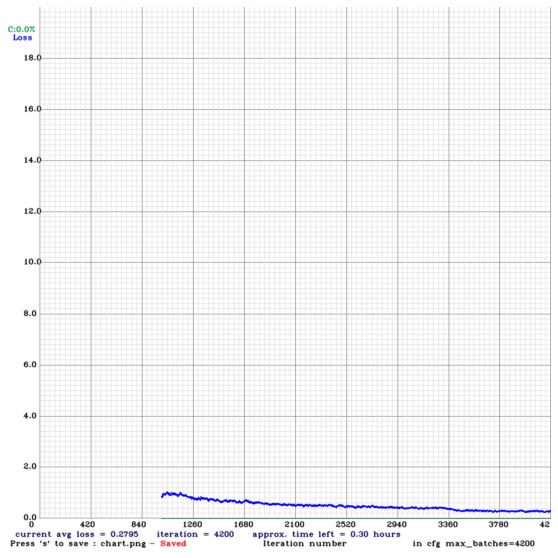

In [ ]:
imShow("chart.png")

**학습한 모델로 쓰러진 사람 검출하기**

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 152 x 152 x 128 0.003 B

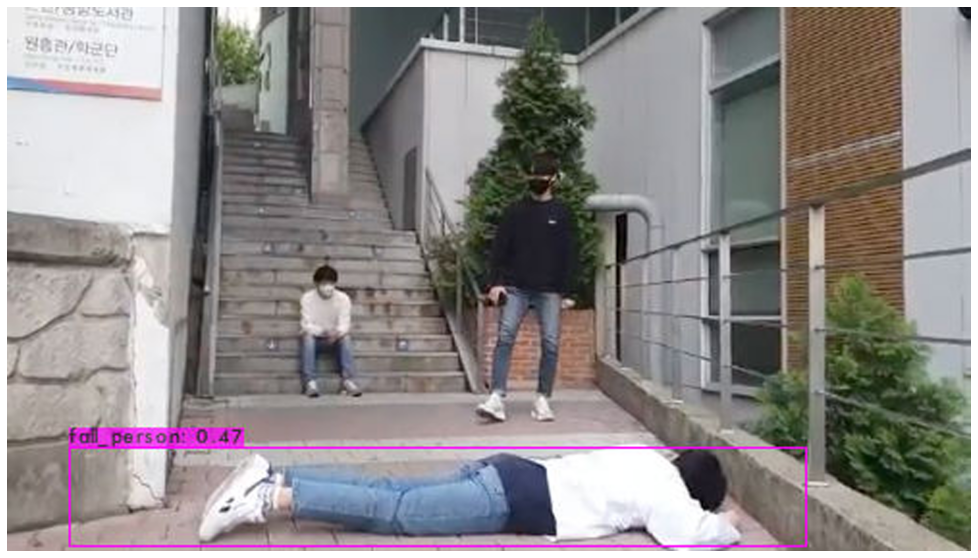

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test obj.data yolov3_custom.cfg backup_1203/yolov3_custom_2000.weights data/model_test/fall_1.png -thresh 0.1
imShow('predictions.jpg')